In [ ]:
!pip install tensorflow opencv-python matplotlib
!pip install gdown

In [ ]:
#!pip list

In [ ]:
import tensorflow as tf
import os

In [ ]:
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#!cp -r /content/drive/My\ Drive/data /content/
import gdown

id_archivio = '1WAM5kXpkIcFXgsqb9dq1RxwC1ot1WvT7'
url = f'https://drive.google.com/uc?id={id_archivio}'

gdown.download(url, output='data.zip', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1WAM5kXpkIcFXgsqb9dq1RxwC1ot1WvT7
To: /content/data.zip
100%|██████████| 63.4M/63.4M [00:03<00:00, 20.7MB/s]


'data.zip'

In [ ]:
import zipfile
#import os

nome_file_zip = 'data.zip'


with zipfile.ZipFile(nome_file_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/')

os.remove(nome_file_zip)


In [ ]:
!rm -rf `find -type d -name .ipynb_checkpoints`
data = tf.keras.utils.image_dataset_from_directory('data')
data.class_names

Found 3096 files belonging to 2 classes.


['normal', 'sick']

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
tch = data_iterator.next()

In [ ]:
batch = data_iterator.next()

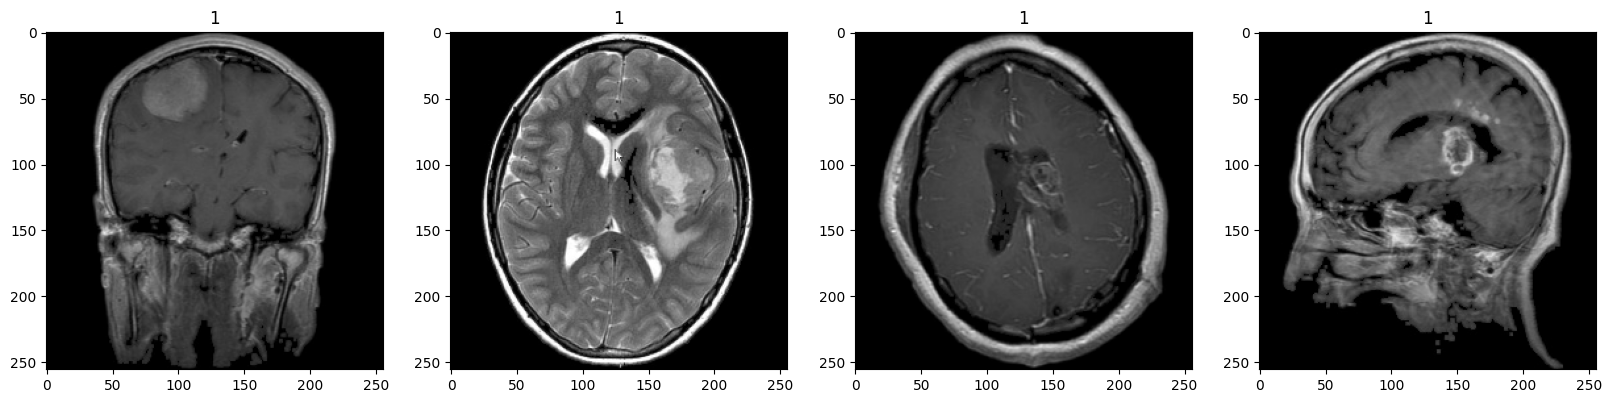

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
#model.summary()

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
67/67 [==============================] - 19s 87ms/step - loss: 0.4049 - accuracy: 0.8619 - val_loss: 0.2672 - val_accuracy: 0.8964
Epoch 2/10
67/67 [==============================] - 5s 77ms/step - loss: 0.2664 - accuracy: 0.8988 - val_loss: 0.2233 - val_accuracy: 0.9013
Epoch 3/10
67/67 [==============================] - 6s 81ms/step - loss: 0.1574 - accuracy: 0.9380 - val_loss: 0.1726 - val_accuracy: 0.9424
Epoch 4/10
67/67 [==============================] - 5s 77ms/step - loss: 0.1004 - accuracy: 0.9632 - val_loss: 0.1814 - val_accuracy: 0.9507
Epoch 5/10
67/67 [==============================] - 6s 90ms/step - loss: 0.0861 - accuracy: 0.9692 - val_loss: 0.1884 - val_accuracy: 0.9507
Epoch 6/10
67/67 [==============================] - 5s 76ms/step - loss: 0.0337 - accuracy: 0.9874 - val_loss: 0.1662 - val_accuracy: 0.9523
Epoch 7/10
67/67 [==============================] - 6s 81ms/step - loss: 0.0139 - accuracy: 0.9972 - val_loss: 0.1588 - val_accuracy: 0.9638
Epoch 8/10
6

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

In [ ]:
import cv2

In [ ]:
img = cv2.imread('prova.jpg')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

In [ ]:
if yhat > 0.5:
    print('Il cervello potrebbe essere malato (tumore)')
else:
    print('Il cervello dovrebbe essere sano')